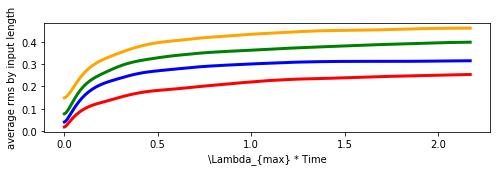

In [34]:
DMD_2bit = np.load('DMD_Nres_1000_2bit/DMD_Nres_1000_2bit.npy')
DMD_4bit = np.load('DMD_Nres_1000_4bit/DMD_Nres_1000_4bit.npy')
DMD_6bit = np.load('DMD_Nres_1000_6bit/DMD_Nres_1000_6bit.npy')
DMD_8bit = np.load('DMD_Nres_1000_8bit/DMD_Nres_1000_8bit.npy')

plt.figure(1,figsize=(8,2))
plt.ylabel('average rms by input length')
plt.xlabel('\Lambda_{max} * Time')
plt.plot(tt[:DMD_2bit.shape[0]]*lyap_exp_max, DMD_2bit, color='orange', linewidth=3.0)
plt.plot(tt[:DMD_4bit.shape[0]]*lyap_exp_max, DMD_4bit, color='green', linewidth=3.0)
plt.plot(tt[:DMD_6bit.shape[0]]*lyap_exp_max, DMD_6bit, color='blue', linewidth=3.0)
plt.plot(tt[:DMD_8bit.shape[0]]*lyap_exp_max, DMD_8bit, color='red', linewidth=3.0)
plt.savefig('DMD_encoding_depth_dependence.png')
plt.show;

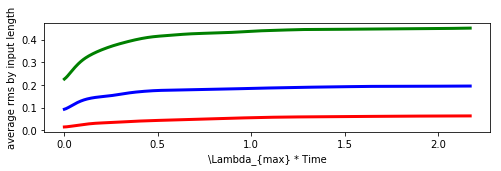

In [33]:
SLM_Nres_10000 = np.load('SLM_Nres_10000/SLM_8bit.npy')
SLM_Nres_1000 = np.load('SLM_Nres_1000/SLM_8bit.npy')
SLM_Nres_100 = np.load('SLM_Nres_100/SLM_8bit.npy')

plt.figure(1,figsize=(8,2))
plt.ylabel('average rms by input length')
plt.xlabel('\Lambda_{max} * Time')
plt.plot(tt[:SLM_Nres_10000.shape[0]]*lyap_exp_max, SLM_Nres_10000, color='red', linewidth=3.0)
plt.plot(tt[:SLM_Nres_1000.shape[0]]*lyap_exp_max, SLM_Nres_1000, color='blue', linewidth=3.0)
plt.plot(tt[:SLM_Nres_100.shape[0]]*lyap_exp_max, SLM_Nres_100, color='green', linewidth=3.0)
plt.savefig('SLM_Nres_dependence.png')
plt.show;

In [1]:
#!/usr/bin/python

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# import os
# import sys
import numpy as np

import time

from reservoir import Reservoir
import data

%load_ext autoreload
%autoreload 1
%aimport data
%aimport reservoir

%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
roll_num = 200
spatial_points = 20
enc_depth = 10
n_res = 1000
b = Reservoir(n_res=n_res, input_scale=2, train_method='ridge', train_param=2000,
              weights_type='complex gaussian', random_projection='simulation',
              activation_fun='phase_8bit', activation_param=1,encoding_method='phase', 
              encoding_param=1, input_dim=spatial_points+1, forget=100) 
#(2**enc_depth)*spatial_points spatial_points+1

In [25]:
ks_data, xx, tt = data.kuramoto_sivashinsky(sequence_length=2000, n_sequence=1, spatial_points=spatial_points)
y = data.roll_and_concat(ks_data, roll_num=roll_num)
b.fit(ks_data, y)

Start of training...
Initialization finished. Elapsed time:
0.07553696632385254
100%|██████████| 2001/2001 [00:01<00:00, 1573.19it/s]
Iterations finished. Elapsed time:
1.35054349899292
Training finished. Elapsed time:
1.9733200073242188
Training score:
0.9102254547323072


Reservoir(activation_fun='phase_8bit', activation_param=1,
          encoding_method='phase', encoding_param=1, forget=100, input_dim=21,
          input_scale=2, n_res=1000, opu_transform=None,
          random_projection='simulation',
          random_state=<mtrand.RandomState object at 0x7ff3040464c8>,
          res_scale=1, save=0, train_method='ridge', train_param=2000,
          verbose=1, weights_type='complex gaussian')

In [26]:
ks_data, xx, tt = data.kuramoto_sivashinsky(sequence_length=2000, n_sequence=1, spatial_points=spatial_points)
y = data.roll_and_concat(ks_data, roll_num=roll_num)[:, b.forget:, :]
# y = y [:, b.forget:, :]
y_target = y.reshape(-1, y.shape[-1])
pred_output, valid_score = b.score(ks_data, y_target)

Start of testing...
Initialization finished. Elapsed time:
0.002340078353881836
100%|██████████| 2001/2001 [00:01<00:00, 1556.81it/s]
Iterations finished. Elapsed time:
1.2906153202056885
Testing finished. Elapsed time:
1.9138665199279785
Testing finished. Elapsed time:
1.9733200073242188
Testing score:
-0.0729842006030541


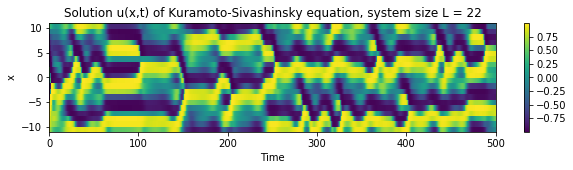

In [9]:
ks_data_, xx_, tt_ = data.kuramoto_sivashinsky(sequence_length=2000, n_sequence=1, spatial_points=20)
tt_ = np.linspace(np.amin(tt_), np.amax(tt_), tt_.shape[2])
xx_ = xx_.flatten()
dd = ks_data_[0, :,:]
plt.figure(1,figsize=(10,2))
plt.title('Solution u(x,t) of Kuramoto-Sivashinsky equation, system size L = 22')
plt.ylabel('x')
plt.xlabel('Time')
im=plt.pcolormesh(tt_, xx_, dd.T, cmap='viridis')
plt.colorbar(im)

In [ ]:
def delta(series,i,j):
    return np.linalg.norm(d[i]-d[j])
 
N=len(d)
eps=0.15
dlist=[[] for i in range(N)]
n=0 #number of nearby pairs found
for i in range(N):
    for j in range(i+1,N):
        if delta(d,i,j) < eps:
            n+=1
            print (n)
            for k in range(min(N-i,N-j)):
                dlist[k].append(np.log(delta(d,i+k,j+k)))

In [32]:
np.sum([delta(d,i,i+1) for i in range(N-1)])/(N-1)

0.44605697403709144

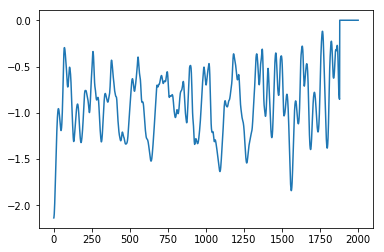

In [14]:
spectrum = np.zeros(N)
for i in range(N):
    if len(dlist[i]):
         spectrum[i] = sum(dlist[i])/len(dlist[i])
    else:
        spectrum[i] = 0
plt.plot(spectrum)

ValueError: x and y must have same first dimension, but have shapes (2000,) and (199,)

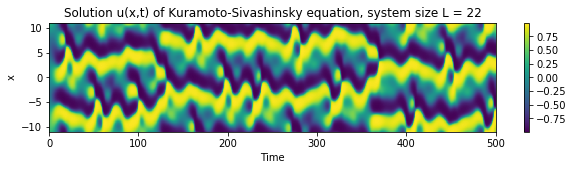

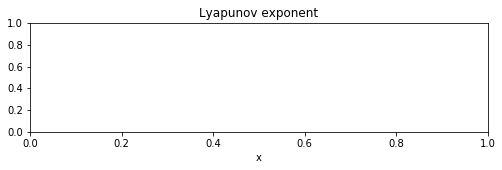

In [38]:
ks_data_, xx_, tt_ = data.kuramoto_sivashinsky(sequence_length=2000, n_sequence=1, spatial_points=200)
tt_ = np.linspace(np.amin(tt_), np.amax(tt_), tt_.shape[2])
xx_ = xx_.flatten()
d = ks_data_[0, :,:]

plt.figure(1,figsize=(10,2))
plt.title('Solution u(x,t) of Kuramoto-Sivashinsky equation, system size L = 22')
plt.ylabel('x')
plt.xlabel('Time')
im=plt.pcolormesh(tt_, xx_, d.T, cmap='viridis')
plt.colorbar(im)

d_rolled = d - np.roll(d, -1, axis=1)
d_rolled = d_rolled[:, :-1]
lyap_exp = (np.log(np.sum(np.abs(d_rolled/d_rolled[0, :]), axis=0)/np.amax(tt_)))[1:]
lyap_exp_max = np.amax(lyap_exp)
plt.figure(2,figsize=(8.2,2))
plt.title('Lyapunov exponent')
plt.xlabel('x')
im=plt.plot(tt_[:-1], lyap_exp)

plt.figure(3,figsize=(10,2))
plt.title('Solution u(x,t) of Kuramoto-Sivashinsky equation, system size L = 22')
plt.ylabel('x')
plt.xlabel('\Lambda_{max} * Time')
im=plt.pcolormesh(tt_*lyap_exp_max, xx_, d.T, cmap='viridis')
plt.colorbar(im)

In [ ]:
# rms for phase encoding

length_input = pred_output.shape[0]-roll_num
rms = np.zeros((length_input, roll_num))
for n_input in range(1, length_input):
    for n_pred in range(1, roll_num):
        d1 = pred_output[n_input, :].reshape(-1, spatial_points+1)[0:n_pred,:]
        d2 = y_target[n_input:n_input+n_pred, 0:spatial_points+1]
        
        rms[n_input, n_pred] = np.sqrt(1./(n_pred*(spatial_points+1))*np.sum((d1.flatten() - d2.flatten())**2))

time_input = tt[0:n_input+1]*lyap_exp_max
time_pred = tt[0:roll_num]*lyap_exp_max

plt.figure(1,figsize=(10,2))
plt.title('rms for phase encoding')
plt.ylabel('input length')
plt.xlabel('\Lambda_{max} * Time')
im=plt.pcolormesh(time_pred, time_input, rms[:,:], cmap='gist_heat')
plt.colorbar(im)
plt.show;

plt.figure(2,figsize=(8,2))
plt.ylabel('average rms by input length')
plt.xlabel('\Lambda_{max} * Time')
plt.plot(time_pred[1:], np.sum(rms[:,1:], axis=0)/length_input)
plt.show;
# np.save('SLM_timesteps_20000.npy', np.sum(rms[:,1:], axis=0)/length_input)

In [ ]:
n_input = 1000 #round(pred_output.shape[0]/2-300)

input_data = y_target[0:n_input, 0:spatial_points+1]

prediction = np.zeros((roll_num, spatial_points + 1))
for i in range(roll_num):
    prediction[i, :] = pred_output[n_input, i*(spatial_points+1):(i+1)*(spatial_points + 1)]
    
targetted_data = y_target[n_input:n_input+roll_num, 0:spatial_points+1]

time = tt[0:n_input+roll_num]*lyap_exp_max
vmax = max(abs(np.concatenate((prediction,targetted_data,input_data)).flatten()))
vmin = -vmax

fig1 = plt.figure(1, figsize=(10,2))
plt.title('Input data of Kuramoto-Sivashinsky equation, system size L = 22:')
plt.ylabel('x')
plt.xlabel('Time')
im=plt.pcolormesh(time[0:n_input], xx, input_data.T, cmap='seismic', vmin=vmin, vmax=vmax)
plt.colorbar(im)
plt.savefig('SLM_input_data.png')

fig2 = plt.figure(2, figsize=(10,2))
plt.title('True output data')
plt.ylabel('x')
plt.xlabel('Time')
im=plt.pcolormesh(time[0:roll_num], xx, targetted_data.T, cmap='seismic', vmin=vmin, vmax=vmax)
plt.colorbar(im)
plt.savefig('SLM_true_data.png')

fig3 = plt.figure(3, figsize=(10,2))
plt.title('Predicted data')
plt.ylabel('x')
plt.xlabel('Time')
im=plt.pcolormesh(time[0:roll_num], xx, prediction.T, cmap='seismic', vmin=vmin, vmax=vmax)
plt.colorbar(im)
plt.savefig('SLM_predicted_data.png')

fig4 = plt.figure(4, figsize=(10,2))
plt.title('Absolute difference between true and predicted datum')
plt.ylabel('x')
plt.xlabel('Time')
im=plt.pcolormesh(time[0:roll_num], xx, np.abs((targetted_data-prediction).T), cmap='gray', vmin=0, vmax=1)
plt.colorbar(im)
plt.savefig('SLM_true_predicted_difference.png')

<function matplotlib.pyplot.show(*args, **kw)>

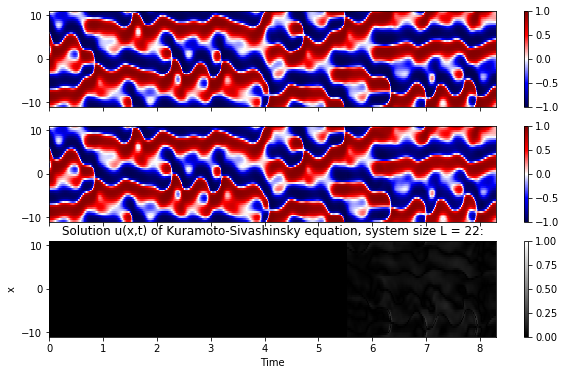

In [9]:
n_input = 1000 #round(pred_output.shape[0]/2-300)
prediction = np.zeros((roll_num, spatial_points + 1))
for i in range(roll_num):
    prediction[i, :] = pred_output[n_input, i*(spatial_points+1):(i+1)*(spatial_points + 1)]
all_data = np.concatenate((y_target[0:n_input, 0:spatial_points+1], prediction*(1/np.amax(prediction))))

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10,6))
data_1 = y_target[0:n_input+roll_num, 0:spatial_points+1].T
data_2 = all_data.T
data_3 = y_target[0:n_input+roll_num, 0:spatial_points+1].T-all_data.T
time = tt[0:n_input+roll_num]*lyap_exp_max
vmax = max(abs(np.concatenate((data_1,data_2,data_3)).flatten()))
vmin = -vmax
plt.title('Solution u(x,t) of Kuramoto-Sivashinsky equation, system size L = 22:')
plt.ylabel('x')
plt.xlabel('Time')
im=axs[0].pcolormesh(time, xx, y_target[0:n_input+roll_num, 0:spatial_points+1].T, cmap='seismic', vmin=vmin, vmax=vmax)
plt.colorbar(im, ax=axs[0])

im=axs[1].pcolormesh(time, xx, all_data.T, cmap='seismic', vmin=vmin, vmax=vmax)
plt.colorbar(im, ax=axs[1])

im=axs[2].pcolormesh(time, xx, np.abs(y_target[0:n_input+roll_num, 0:spatial_points+1].T-all_data.T), cmap='gray', vmin=0, vmax=1)
plt.colorbar(im, ax=axs[2])
plt.show